<a href="https://colab.research.google.com/github/supragyabajpai/MachineLearning_Repository/blob/master/SupragyaBajpai_179303146_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Supragya Bajpai 179303146**

In [1]:
#uploading the dataset 
from google.colab import files
uploaded= files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


In [7]:
#importing all the liberaries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import missingno
import seaborn as sns
dataset = pd.read_csv('heart_failure_clinical_records_dataset.csv')#reading the dataset

In [4]:
dataset.head()#first five values of the data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
#check the missing data
display(dataset.isnull().sum())
#there are no missing values

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

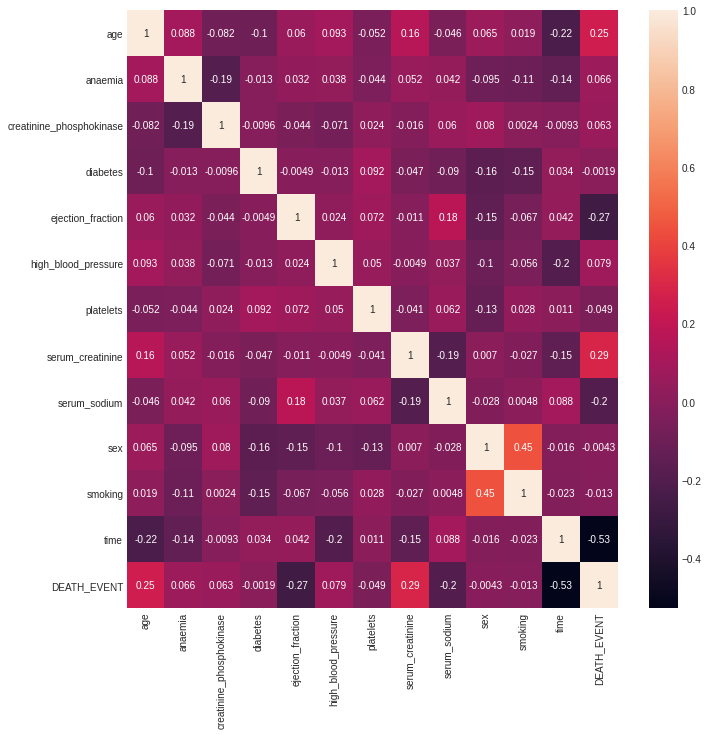

In [9]:
#checking coorelation
plt.subplots(figsize=(11, 11)) 
sns.heatmap(dataset.corr(),annot=True)

In [30]:
#as we can see that there is diffrence between the columns,hence we will normalize the data
from sklearn.preprocessing import MinMaxScaler 
minmax_scaler = MinMaxScaler()
dataset_normal = pd.DataFrame(minmax_scaler.fit_transform(dataset), columns = dataset.columns)
dataset_normal.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235,1.0


In [14]:
#dividing the dataset into dependent and independent 
X = dataset_normal.loc[:, dataset_normal.columns != 'DEATH_EVENT']
y =dataset_normal['DEATH_EVENT']

In [16]:
#splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

appling **KNN**

In [29]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
classifier = KNeighborsClassifier(n_neighbors=3)#knn model with k=3
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred)*100)
cm = confusion_matrix(y_test, y_pred)
print('')
print(cm)

Accuracy: 75.0

[[34  3]
 [12 11]]


In [28]:
classifier_1 = KNeighborsClassifier(n_neighbors=5)#with k=5
classifier_1.fit(X_train,y_train)
y_pred = classifier_1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred)*100)
cm_1 = confusion_matrix(y_test, y_pred)
print('')
print(cm_1)

Accuracy: 70.0

[[37  0]
 [18  5]]


In [27]:
classifier_2 = KNeighborsClassifier(n_neighbors=7)#with k=7
classifier_2.fit(X_train,y_train)
y_pred = classifier_2.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred)*100)
cm_2 = confusion_matrix(y_test, y_pred)
print('')
print(cm_2)

Accuracy: 66.66666666666666

[[36  1]
 [19  4]]


In [ ]:
#as we can see that as we are increasing the value of k,the accuracy of the model is decreasing